In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def SA(F, T, opc, convR, lB, uB, g, init):
    scale = np.sqrt(T) ## Suggested by Robert & Casella (Intro to MC)
    cur_sol = [init[0], init[1]]
    bounds = [(lB[0],uB[0]),(lB[1],uB[1])]
    print('Pontos iniciais: ', cur_sol, F(cur_sol))
    best = cur_sol
    convergencia = []
    history = [cur_sol]
    nProg = 0
    i = 0

    def is_feasible(sol):
        x, y = sol
        is_feasible = True
        if not g:  # Se não há restrições
            return is_feasible
        for constraint in g:
            if constraint(x,y) <= 0:
                is_feasible = False
        return is_feasible

    while True:
        i+=1
        # Cálculo da vizinhança
        while True:
            new_sol = cur_sol + np.random.uniform(-1, 1, size=2) * scale
            new_sol = np.clip(new_sol, [b[0] for b in bounds], [b[1] for b in bounds])
            if is_feasible(new_sol):
                break

        cur_F = F(cur_sol)
        new_F = F(new_sol)

        # Diferença de Energia
        deltaE = new_F - cur_F

        # Aceitação probabilística
        b = np.random.rand()
        if np.log(b)*T - deltaE < 0: # Caso TRUE, o candidato é descartado
            new_sol = cur_sol  

        cur_sol = new_sol

        if cur_F < F(best):
            best = cur_sol
            nProg = 0
        else:
            nProg += 1
        convergencia.append(F(cur_sol))
        if i > convR:
            del convergencia[0]
            if np.std(convergencia) <= 1e-3:
                print(f'Convergiu em {i} iterações, desvio padrão: {np.std(convergencia)}')
                break

        T = resfriamento(T,i,deltaE, 0.9, 0, opc, nProg)
        history.append(cur_sol)
        
    dicio = {'1': 'Linear', '2': 'Geométrico', '3': 'Logarítimico', '4': 'Híbrido', '5': 'Exponencial', '6': 'Adaptativo', '7': 'Fast'}
    print(f'Escolhido: \n   Resfriamento {dicio[str(opc)]}')
    return cur_sol, history, best
    
def resfriamento(T, k, deltaE, a = 0.75, b = 0, opc = 0, nProg = 0):
    if opc == 1: # Linear
        T = T - a
    elif opc == 2: # Geométrica
        T = a*T
    elif opc == 3: # Logarítimica
        T = (np.log(k)/np.log(k+1)) * T
    elif opc == 4: # Híbrida
        if k <= b:
            T = (k/(k+1))*T
        else:
            T = a*T
    elif opc == 5: # Exponencial - Converge em 10000
        T = T/(1+b*T)
    elif opc == 6: # Adaptativa, ASA
        if nProg > 4:
            a *= 1.1
        else:
            a *= 0.9
        T *= a
    elif opc == 7: # Fast, FSA
        T = T/(1+k)
    return T

Pontos iniciais:  [-4.5, -4.5] 80.5
Convergiu em 971 iterações, desvio padrão: 0.0
Escolhido: 
   Resfriamento Geométrico
[-0.06502365  1.03536449]


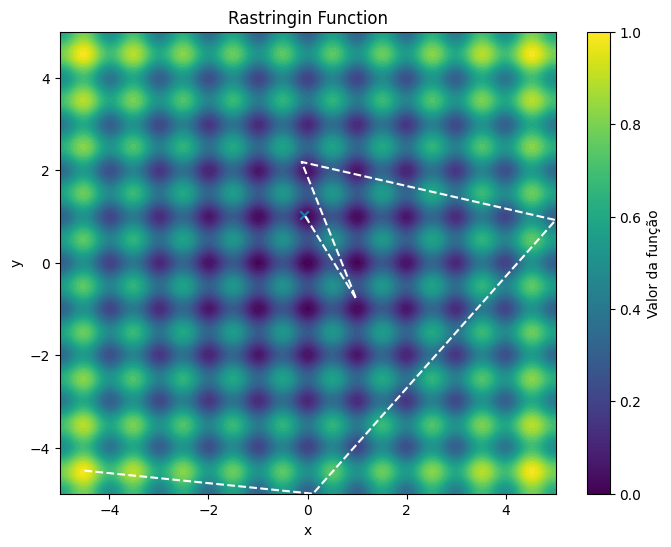

In [200]:
def function(sol):
    x, y = sol
    return 10*2 + x**2 - 10*np.cos(2*np.pi*x) + y**2 - 10*np.cos(2*np.pi*y)

xx = np.linspace(-5,5,500)
yy = np.linspace(-5,5,500)

X,Y = np.meshgrid(xx,yy)
sol, history, best = SA(function, T = 100, opc = 2, convR = 800, lB=[-5,-5], uB=[5,5], g = [], init=[-4.5,-4.5])
print(sol)
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, function([X,Y]), levels=50, cmap='viridis')
plt.scatter(sol[0],sol[1], marker='x')
history_x = [h[0] for h in history]
history_y = [h[1] for h in history]
plt.plot(history_x, history_y, color='white', linestyle='--', label='Trajetória')
plt.colorbar(label='Valor da função')
plt.title('Rastringin Function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Pontos iniciais:  [0, 0] 0.0
Convergiu em 1184 iterações, desvio padrão: 1.4210854715202004e-14
Escolhido: 
   Resfriamento Geométrico
[-2.80179044 -2.85752692]


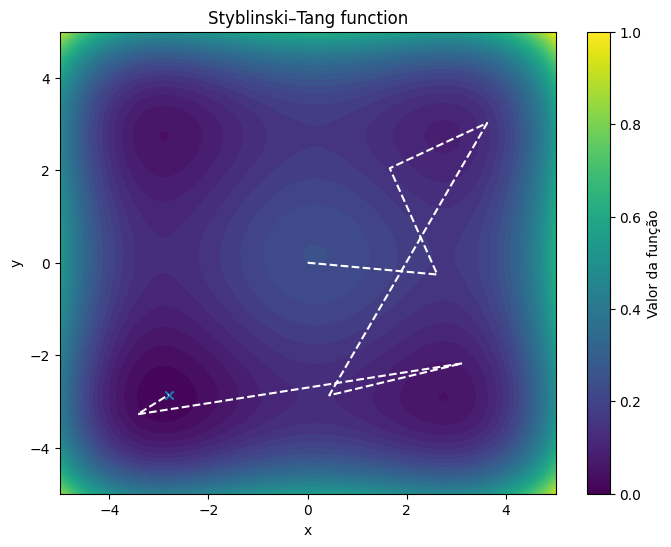

In [181]:
def function(sol):
    x, y = sol
    return (x**4 - 16*x**2 + 5*x + y**4 - 16*y**2 + 5*y)/2

xx = np.linspace(-5,5,500)
yy = np.linspace(-5,5,500)

X,Y = np.meshgrid(xx,yy)
sol, history, best = SA(function, T = 100, opc = 2, convR = 800, lB=[-5,-5], uB=[5,5], g = [], init=[0,0])
print(sol)
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, function([X,Y]), levels=50, cmap='viridis')
plt.scatter(sol[0],sol[1], marker='x')
history_x = [h[0] for h in history]
history_y = [h[1] for h in history]
plt.plot(history_x, history_y, color='white', linestyle='--', label='Trajetória')
plt.colorbar(label='Valor da função')
plt.title('Styblinski–Tang function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Pontos iniciais:  [-4.5, -4.5] 40.5
Convergiu em 943 iterações, desvio padrão: 2.0816681711721685e-17
Escolhido: 
   Resfriamento Geométrico
[ 0.19335867 -0.13238072]


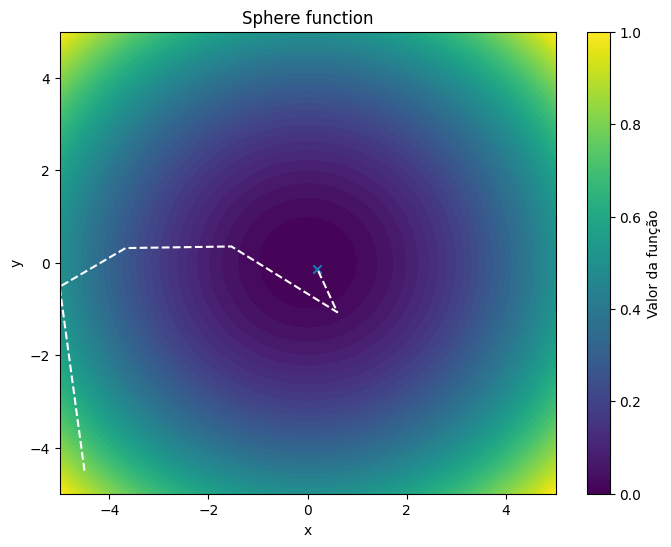

In [182]:
def function(sol):
    x, y = sol
    return x**2 + y**2

xx = np.linspace(-5,5,500)
yy = np.linspace(-5,5,500)

X,Y = np.meshgrid(xx,yy)
sol, history, best = SA(function, T = 100, opc = 2, convR = 800, lB=[-5,-5], uB=[5,5], g = [], init=[-4.5,-4.5])
print(sol)
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, function([X,Y]), levels=50, cmap='viridis')
plt.scatter(sol[0],sol[1], marker='x')
history_x = [h[0] for h in history]
history_y = [h[1] for h in history]
plt.plot(history_x, history_y, color='white', linestyle='--', label='Trajetória')
plt.colorbar(label='Valor da função')
plt.title('Sphere function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Pontos iniciais:  [5, 5] 50
Convergiu em 1051 iterações, desvio padrão: 0.0
Escolhido: 
   Resfriamento Geométrico


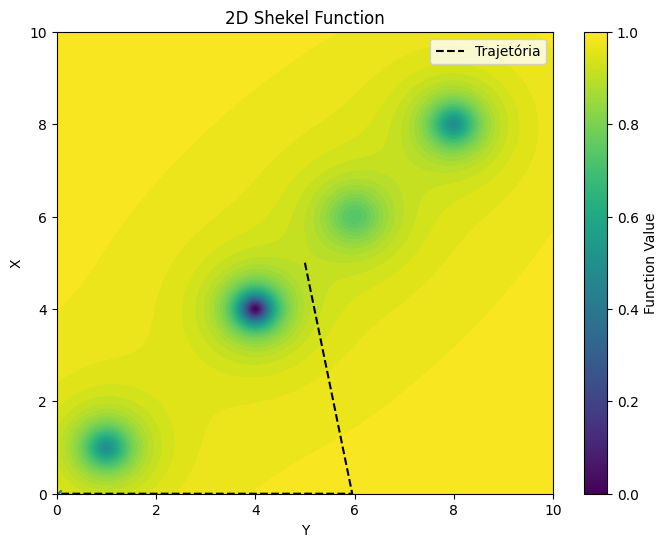

In [183]:
# Define a Shekel function
def shekel(x):
    a = np.array([
    [4, 4],
    [1, 1],
    [8, 8],
    [6, 6]
])
    c = np.array([0.1, 0.2, 0.2, 0.4])
    total = 0
    for i in range(len(c)):
        diff = x - a[i]
        total += 1 / (np.dot(diff, diff) + c[i])
    return -total

# Grid for visualization
xx = np.linspace(0, 10, 500)
yy = np.linspace(0, 10, 500)
X, Y = np.meshgrid(xx, yy)

# Calculate Shekel values
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = shekel(np.array([X[i, j], Y[i, j]]))

sol, history, best = SA(function, T = 1000, opc = 2, convR = 1000, lB=[0,0], uB=[10,10], g = [], init=[5,5])

# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.scatter(sol[0],sol[1], marker='x')
history_x = [h[0] for h in history]
history_y = [h[1] for h in history]
plt.plot(history_x, history_y, color='black', linestyle='--', label='Trajetória')
plt.colorbar(label='Function Value')
plt.title('2D Shekel Function')
plt.xlabel('Y')
plt.ylabel('X')
plt.legend()
plt.show()

Pontos iniciais:  [-0.5, 1.5] 158.5
Convergiu em 1893 iterações, desvio padrão: 0.0
Escolhido: 
   Resfriamento Geométrico
[1.06096124 0.98608249]


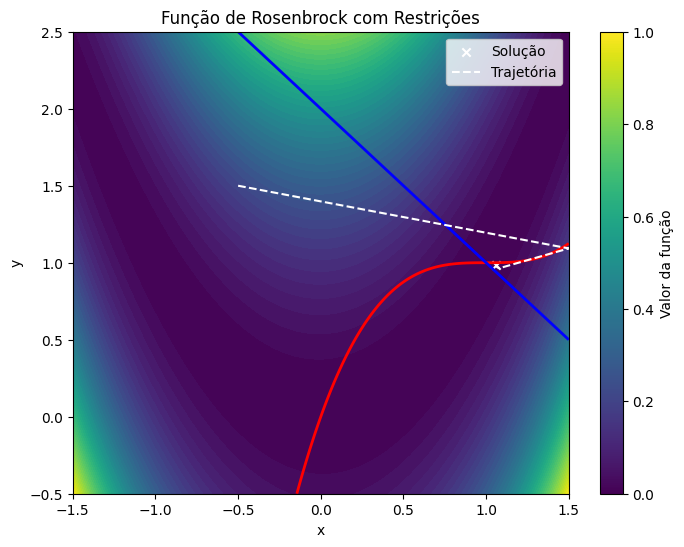

In [236]:
def function(sol):
    x, y = sol
    return (1 - x)**2 + 100 * (y - x**2)**2

# Define the constraints
g1 = lambda x, y: (x - 1)**3 - y + 1
g2 = lambda x, y: x + y - 2

# Create a grid for plotting
xx = np.linspace(-1.5, 1.5, 500)
yy = np.linspace(-0.5, 2.5, 500)
X, Y = np.meshgrid(xx, yy)

Z = function([X, Y])
G1 = g1(X, Y)
G2 = g2(X, Y)

sol, history, best = SA(function, T=100, opc=2, convR=1000, lB=[-1.5, -0.5], uB=[1.5, 2.5], g=[g1, g2], init=[-0.5, 1.5])
print(sol)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.contour(X, Y, G1, levels=[0], colors='red', linewidths=2)
plt.contour(X, Y, G2, levels=[0], colors='blue', linewidths=2)
plt.scatter(sol[0], sol[1], marker='x', color='white', label='Solução')
history_x = [h[0] for h in history]
history_y = [h[1] for h in history]
plt.plot(history_x, history_y, color='white', linestyle='--', label='Trajetória')
plt.colorbar(label='Valor da função')
plt.title('Função de Rosenbrock com Restrições')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()